# Week 12 Spatial Vector Data Homework Template

## Assignment Background

In this assignment, you will explore an area in California called the [San Joaquin Experimental Range](https://www.neonscience.org/field-sites/field-sites-map/SJER) known by the acronym SJER.

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('spatial-vector-lidar')`

To begin, add all of the needed package imports, download the data and set your working directory in the cells below. 

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.notebook as nb
import matplotcheck.autograde as ag
import matplotcheck.vector as vct
import numpy as np
import pandas as pd

# This will hide one of geopandas warnings in cell 3
import warnings
warnings.filterwarnings(
    'ignore',
    'GeoSeries.notna',
    UserWarning
)


In [15]:
# Import packages, download data, and set working directory here

# YOUR CODE HERE
import os
import numpy as np
import geopandas as gpd
import earthpy as et
import matplotlib.pyplot as plt

et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data'
))

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_import_points = 0

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
    wd_import_points += 4
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

print("\n \u27A1 You received {} out of 4 points for setting your working directory and imports.".format(
    wd_import_points))
wd_import_points

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data

 ➡ You received 4 out of 4 points for setting your working directory and imports.


4


## Challenge 1a: Open And Clip Your Vector Data

The NEON **SJER** field site is located in California. Your first task is to explore the area by creating a map of California roads that has symbology that represents different road types.

### Open the roads layer and clip it using the SJER_crop extent

In the cell below:

1. Open the `california/madera-county-roads/tl_2013_06039_roads.shp` file located in your `spatial-vector-lidar` data download using GeoPandas. 
2. Reproject the roads data to be the same CRS as the area of interest. They should both have the CRS of `EPSG:32611`.
3. Clip the data using the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`) layer. 
4. Open the SJER plot locations data (`california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`). 
5. Set all `RTTYP` that are "none" to "Unknown" using the syntax: `roads-object-name["RTTYP"].fillna("Unknown", inplace=True)`

Call the **clipped and reprojected roads shapefile geodataframe object** at the 
end of the cell to ensure the tests below run.


In [52]:
# YOUR CODE HERE
roads_str = "spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp"
roads_path = os.path.normpath(roads_str)
roads = gpd.read_file(roads_path)
roads = roads.to_crs("EPSG:32611")

sjer_str = "spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp"
sjer_path = os.path.normpath(sjer_str)
sjer = gpd.read_file(sjer_path)
sjer = sjer.to_crs("EPSG:32611")

clipped_roads = gpd.clip(roads, sjer)

sjer_plot_str = "spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp"
sjer_plot_path = os.path.normpath(sjer_plot_str)
sjer_plot = gpd.read_file(sjer_plot_path)
sjer_plot = sjer_plot.to_crs("EPSG:32611")

clipped_roads["RTTYP"].fillna("Unknown", inplace=True)
clipped_roads


,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
2189,110454253913,None,Unknown,S1400,"LINESTRING (258166.923 4108351.911, 258165.443..."
5606,110454253912,None,Unknown,S1400,"LINESTRING (258166.923 4108351.911, 258196.856..."
6742,110454253914,None,Unknown,S1400,"LINESTRING (258068.216 4108434.372, 258077.141..."
2167,110454253911,None,Unknown,S1400,"LINESTRING (258110.740 4108527.332, 258108.670..."
6717,110454253910,None,Unknown,S1400,"LINESTRING (257983.127 4108743.339, 257976.016..."
5587,110454253909,None,Unknown,S1400,"LINESTRING (257983.127 4108743.339, 258001.855..."
7879,110454245219,O'Neal Rd,M,S1400,"LINESTRING (257423.271 4107303.077, 257414.988..."
6718,110454238841,211 Rd,M,S1400,"LINESTRING (257423.271 4107303.077, 257414.988..."
6716,110454254255,None,Unknown,S1400,"LINESTRING (258726.876 4109197.037, 258677.968..."
311,110454242886,Old Oak Stage Pl,M,S1400,"LINESTRING (258867.409 4109636.978, 258866.813..."


In [53]:
# DO NOT MODIFY THIS CELL

## Challenge 1b: Create a Figure Of Your Study Area

In the cell below, add code to create your challenge figure using the 
objects that you generated above.

Create a map that shows the madera roads layer, SJER plot locations and the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`). All data should be cropped to your
SJER boundary crop extent (your Area Of Interest or AOI)

### Important Notes For Your Figure

1. Plot the roads so different **road types** are represented using unique symbology using the `RTTYP` attribute.
2. Add the plot locations to your map. Color each location according to the attribute **plot type** using unique symbology for each `plot_type` in the data.
3. Add a **title** to your figure.
4. Be sure that your plot legend is not covering your final map.
5. **IMPORTANT:** be sure that all of the data are cropped to the **same spatial extent**
and **crs**. This means that you have to clip and reproject your data prior to plotting it.

In [54]:
sjer_plot.plot_type.unique()

array(['trees', 'grass', 'soil'], dtype=object)

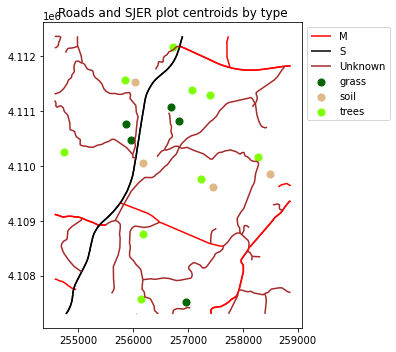

In [60]:
# PLOT 1 - Place only the code required to create a plot of your data here
# Additional processing code can go above this code cell

# YOUR CODE HERE
# Plot Data
fig, ax = plt.subplots(figsize=(5, 5))

# Add the plot points in sets grouped by plot_type
roads_symb = {'M': 'red',
               'S': 'black',
               'Unknown': 'brown'}

for rtype, road_type_df in clipped_roads.groupby('RTTYP'):
    color = roads_symb[rtype]
    label = rtype
    road_type_df.plot(color=color,
                   ax=ax,
                   label=label,
                   markersize=50)

points_symb = {'trees': 'chartreuse',
               'grass': 'darkgreen',
               'soil': 'burlywood'}

for ctype, sjer_plot_type in sjer_plot.groupby('plot_type'):
    color = points_symb[ctype]
    label = ctype
    sjer_plot_type.plot(color=color,
                   ax=ax,
                   label=label,
                   markersize=50)

# Add a legend
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Roads and SJER plot centroids by type")
plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
plot01_roads_plot_locs = nb.convert_axes(plt, which_axes="current")

In [56]:
# DO NOT MODIFY THIS CELL


### Figure 1 - Manual Points - 
* Points for plot title being expressive

## Question (5 points)

What does the RTTYP road type acronyms **M** and **S** stand for? 
Please your answer in the markdown cell BELOW.

HINT: use the `tl_2013_06039_roads.shp.xml` file in your data download to help you figure out the answer to this question
HINT2: you can also find good results using Google (on the column name)! 

M = Common Name;
S = State recognized

## Challenge 2: Figure 2 - Roads in Del Norte, Modoc & Siskiyou Counties

Create a plot of roads that are located in: Del Norte, Modoc & Siskiyou Counties. To do this, you will need the following layers:

* Counties in California: `california/CA_Counties/CA_Counties_TIGER2016.shp`
* Roads: `spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp` 

To create this plot, you will need to:

1. Reproject the roads and the county data to `epsg=5070`
2. Select the three counties that you want to work with in the counties dataset. One fast way to do this is using syntax as follows: 

`roads_df[roads_df['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]`

3. Clip the roads data to the boundary of the counties that you wish to look at.
4. Assign each road segment an attribute that identifies it as within each county.

Color the roads in each county using a unique color.

HINT: use the `legend=True` argument in `.plot()` to create a legend.
Because you are only creating a legend for one layer, you can quickly use `.plot()`
rather than `ax.legend()` which is what you used to create the figure above.


### IMPORTANT: 

* Both layers need to the in the SAME coordinate reference system for you to work with them together. REPROJECT both data layers to albers `.to_crs(epsg=5070)`
* Clip the roads to the boundary of the three_counties layer that you created which only contains the 3 selected counties: `"Siskiyou", "Modoc", "Del Norte"`
* To assign each road to its respective county, you will perform a spatial join using `.sjoin()`.
* You will need to redefine the CRS of the roads layer, after the clip, which you can do using something like:

```county_roads.crs = ca_cty_albers.crs```

**NOTE:** you can ignore the warning from pyproj: `'+init=<authority>:<code>' syntax is deprecated.`, which will be resolved by GeoPandas in the next release.

In the cell below, add the code needed to 

* Open each layer
* Reproject the data 
* Clip and subset the data 

At the end of the cell, be sure to call the clipped roads layer.

In [72]:
# In this cell, add the code needed to open, reproject and clip / subset the data

# YOUR CODE HERE
counties_str = "spatial-vector-lidar/california/CA_Counties/CA_Counties_TIGER2016.shp"
counties_path = os.path.normpath(counties_str)
counties = gpd.read_file(counties_path)
counties = counties.to_crs("EPSG:5070")

roads_str = "spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp"
roads_path = os.path.normpath(roads_str)
roads = gpd.read_file(roads_path)
roads = roads.to_crs("EPSG:5070")

counties = counties.loc[counties["NAME"].isin(["Siskiyou", "Modoc", "Del Norte"])]
roads = gpd.clip(roads, counties)

roads_by_county = gpd.sjoin(roads, counties)


In [79]:
student_three_counties = _

three_counties_points = 0

if isinstance(student_three_counties, gpd.geodataframe.GeoDataFrame):
    print("\u2705 Great! Your clipped object is a GeoDataFrame!")
    three_counties_points += 1
else:
    print("\u274C Oops, your clipped object is not a GeoDataFrame.")

if student_three_counties.crs.to_epsg() == 5070:
    print("\u2705 Great! Your clipped object has the correct CRS!")
    three_counties_points += 2
else:
    print("\u274C Oops, your clipped object does not have the correct CRS.")

✅ Great! Your clipped object is a GeoDataFrame!
✅ Great! Your clipped object has the correct CRS!


In [80]:
# DO NOT MODIFY THIS CELL

## Challenge 2b: Figure

In the cell beloow,  add code to create the figure described above.

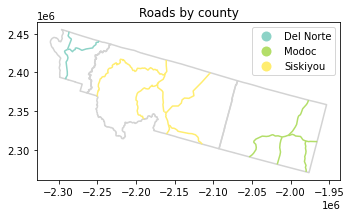

In [81]:
# Figure 2 - Place only the code required to plot your data here
# Additional processing code can go above this code cell

# YOUR CODE HERE
# Plot
fig, ax = plt.subplots(figsize=(5, 5))

# Add the plot points in sets grouped by plot_type
counties.boundary.plot(
    ax=ax,
    color="lightgray"
)

roads_by_county.plot(
    ax=ax,
    column="NAME",
    legend=True,
    cmap="Set3"
)

plt.title("Roads by county")
plt.tight_layout()

### DO NOT REMOVE LINE BELOW ###
plot02_county_roads_clip = nb.convert_axes(plt, which_axes="current")

In [82]:
# DO NOT MODIFY THIS CELL
hw_plot2 = vct.VectorTester(plot02_county_roads_clip)


plot_title = ag.run_test(hw_plot2.assert_title_contains,
                         strings_expected='',
                         points=1,
                         correct_message="\u2705 Plot title exists!",
                         error_message="\u274C Check your plot title exists.")

print(plot_title['message'])


✅ Plot title exists!


## Challenge 3:  Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California

Create a dataframe that shows the total length of road in these counties used in plot 2: Siskiyou, Modoc, and Del Norte. To calculate this, use the data you created for plot 2.

To calculate length of each line in your geodataframe, you can use the syntax `gdf.length`. Create a new column using the syntax:

`gdf["length"] = gdf.length`

You can summarize the data to calculate total length using pandas `.groupby()` on the county column name.

Note: you can use: `pd.options.display.float_format = '{:.4f}'.format` if you'd like to turn off scientific notation for your outputs.

It should look something like this:


||length|
|----|----|
|NAME|| 
|Del Norte| road length here|
|Modoc| road length here|
|Siskiyou| road length here|


At the end of the cell, call the dataframe object

In [93]:
# TABLE 1 - Place the code required to create the dataframe

roads_by_county["length"] = roads_by_county.length
length_by_county = roads_by_county.groupby("NAME").sum()

length_by_county

,scalerank,question,length_km,toll,labelrank,ignore,add,rwdb_rd_id,orig_fid,uident,expressway,min_zoom,min_label,index_right,ALAND,AWATER,length
NAME,,,,,,,,,,,,,,,,,
Del Norte,26,0,297,0,0,0,0,0,0,295425,0,25.1,38.5,170,13030501085,2893801820,121307.565363
Modoc,33,0,637,0,0,0,0,0,542,262353,0,33.0,41.6,175,50704778150,3727126005,245029.146972
Siskiyou,37,0,776,0,0,0,0,0,1024,305790,3,37.0,51.8,378,113833823929,1253757946,472427.949970


In [94]:
# DO NOT MODIFY THIS CELL
# Test that the cali_roads_summary is of type dataframe and named correctly

# Let's make sure you created an object with the correct name and of the correct type above!

student_length_dataframe = _

length_points = 0

if len(student_length_dataframe) == 3:
    print("\u2705 Correct number of entries in the dataframe, good job!")
    length_points += 2
else:
    print("\u274C Incorrect amount of entries in the dataframe.")

if student_length_dataframe.length.dtype == 'float':
    print("\u2705 Length column has the correct datatype!")
    length_points += 2
else:
    print("\u274C Length column does not have the correct datetype.")

✅ Correct number of entries in the dataframe, good job!
✅ Length column has the correct datatype!


In [95]:
# DO NOT MODIFY THIS CELL

## Challenge 4: Plot 3 - Global  Estimated Population 

Create a plot of quantile maps of the sum of global estimated population by region. To do this, you will use the  natural earth data of global political boundaries. This can be found inside of the `spatial-vector-lidar` data downloaded at the start of this assignment. The country data is missing from the earthpy download, so you will need to download it separately, by putting the url directly into `gpd.read_file()`. The url to download country data is:
`https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip`

After you have downloaded the data, import the data and 
1. subset the data to include the following columns: `["REGION_WB", "POP_EST", 'geometry']`
2. Dissolve the data by region (`REGION_WB`) column and aggregate by `sum`. 
    * HINT: you can provide the aggfun= argument with a `[list]` of function names in quotes and it will summarize numeric columns using each function.
3. Create a figure that shows the sum of estimated population (`POP_EST`) by region.
    
**NOTE:** you can ignore the warning from merge: `UserWarning: merging between different levels can give an unintended result`.

In the cell below:

* Open up the data
* Subset the columns needed using `dataframe[["column-1", "column-2", "column-3"]]`
* use the `dissolve` function to dissolve the data by the `REGION_WB` column

Call your final dissolved geodataframe at the end of the cell

In [106]:
# YOUR CODE HERE
country_pop = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
country_pop = country_pop.loc[:, ["REGION_WB", "POP_EST", 'geometry']]
country_pop = country_pop.dissolve(by="REGION_WB", aggfunc=["sum"])

country_pop

/Users/judith/opt/anaconda3/envs/earth-analytics-python/lib/python3.8/site-packages/geopandas/geodataframe.py:1545: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  aggregated = aggregated_geometry.join(aggregated_data)


,geometry,"(POP_EST, sum)"
REGION_WB,,
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03
East Asia & Pacific,"MULTIPOLYGON (((-179.91737 -16.50178, -180.000...",2.325561e+09
Europe & Central Asia,"MULTIPOLYGON (((-53.77852 2.37670, -54.08806 2...",9.209389e+08
Latin America & Caribbean,"MULTIPOLYGON (((-71.37525 -17.77380, -71.46204...",6.449377e+08
Middle East & North Africa,"MULTIPOLYGON (((-11.93722 23.37459, -12.87422 ...",4.551668e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",3.658288e+08
South Asia,"MULTIPOLYGON (((81.21802 6.19714, 80.34836 5.9...",1.835246e+09
Sub-Saharan Africa,"MULTIPOLYGON (((9.30561 1.16091, 9.64916 2.283...",1.106408e+09


In [107]:
# DO NOT MODIFY THIS CELL
student_dissolve_dataframe = _

dissolve_points = 0

if len(student_dissolve_dataframe) == 8:
    print("\u2705 Correct number of entries in the dataframe, good job!")
    dissolve_points += 2
else:
    print("\u274C Incorrect amount of entries in the dataframe.")

if isinstance(student_dissolve_dataframe, gpd.GeoDataFrame):
    print("\u2705 Data is stored in a GeoDataFrame, good job!")
    dissolve_points += 2
else:
    print("\u274C Data is not stored in a GeoDataFrame.")

print("\n \u27A1 You received {} out of 4 points.".format(
    dissolve_points))
dissolve_points

✅ Correct number of entries in the dataframe, good job!
✅ Data is stored in a GeoDataFrame, good job!

 ➡ You received 4 out of 4 points.


4

In [112]:
global_bounds = gpd.read_file("spatial-vector-lidar/global/ne_110m_land/ne_110m_land.shp")

,featurecla,scalerank,geometry
0,Country,1,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Country,1,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,Country,1,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Country,1,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Country,1,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."
...,...,...,...
122,Country,1,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Country,1,"POLYGON ((99.93976 78.88094, 97.75794 78.75620..."
124,Country,1,"POLYGON ((-87.02000 79.66000, -85.81435 79.336..."
125,Country,1,"POLYGON ((-68.50000 83.10632, -65.82735 83.028..."


In [136]:
country_pop.columns

Index(['geometry', ('POP_EST', 'sum')], dtype='object')

In [ ]:
# DO NOT MODIFY THIS CELL

In [ ]:
# DO NOT MODIFY THIS CELL

hw_plot4_rank = vct.VectorTester(plot04_global_population)

results = []

plot_title_rank = ag.run_test(hw_plot4_rank.assert_title_contains,
                              strings_expected='',
                              points=1,
                              correct_message="\u2705 Plot title exists!",
                              error_message="\u274C Check that your plot title exists.")



## Manual points for geometries in plot 

## Do not modify this cell (10 points)

* Here we will grade pep8 format and imports listed at the top following pep 8 conventions.
* Notebook begins with cell [1] and runs without modifications. 
* Be sure that your code can be run on any operating system. This means that:
    * the data should be downloaded in the notebook to ensure it's reproducible
    * all paths should be created dynamically using the os package to ensure that they work across operating systems

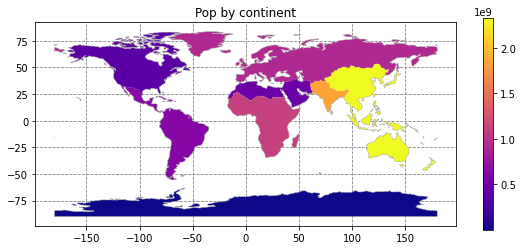

In [154]:
# PLOT 3 - Place only the code required to plot your data here
# Additional processing code can go above this code cell

# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 3.5))

country_pop.plot(
    ax=ax,
    column=("POP_EST", 'sum'),
    legend=True,
    cmap="plasma"
)

global_bounds.boundary.plot(
    ax=ax,
    color="darkgray",
    linewidth=.5
)

plt.title("Pop by continent")
plt.tight_layout()

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--')
ax.xaxis.grid(color='gray', linestyle='--')

### DO NOT REMOVE LINE BELOW ###
plot04_global_population = nb.convert_axes(plt, which_axes="current")